In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
data=pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


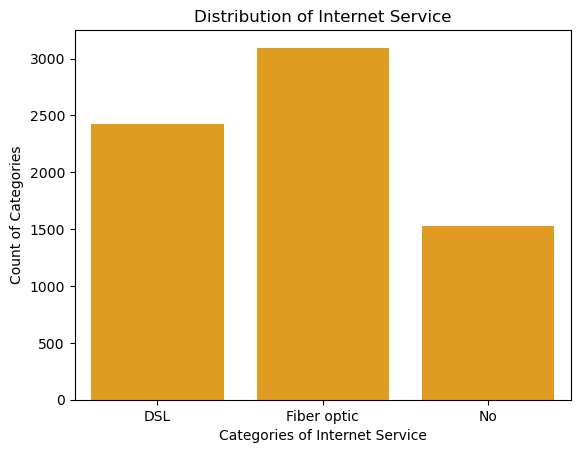

In [7]:
sns.countplot(x='InternetService', data=data, color='orange')
# Set x-axis label
plt.xlabel('Categories of Internet Service')
# Set y-axis label
plt.ylabel('Count of Categories')
# Set title of the plot 
plt.title('Distribution of Internet Service')
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

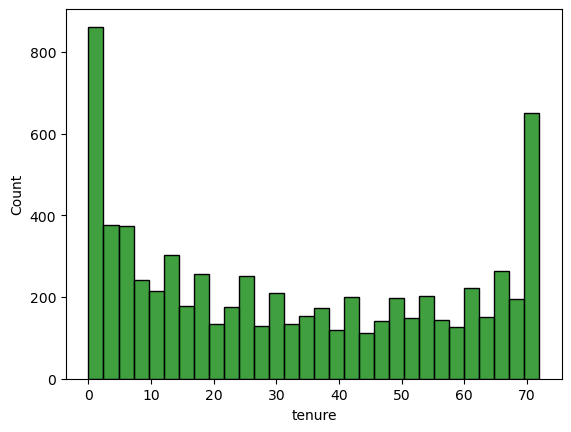

In [8]:
sns.histplot(x='tenure',bins=30,color='green',data=data)


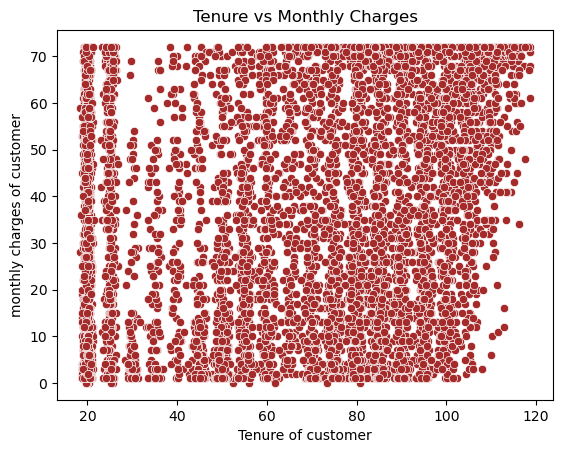

In [9]:
sns.scatterplot(x='MonthlyCharges',y='tenure',data=data,color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('monthly charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

<Axes: xlabel='Contract', ylabel='tenure'>

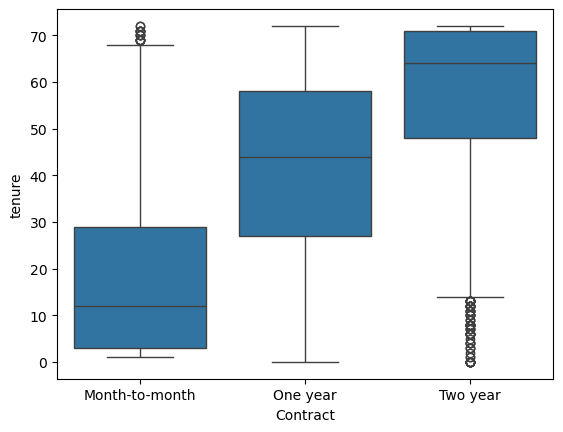

In [12]:
sns.boxplot(y='tenure',x='Contract',data=data)

In [16]:

# Define the independent and dependent variables
X = data[['tenure']]
y = data['MonthlyCharges']

# Split the dataset into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Find out the error in prediction & store the result in 'error'
error = y_test - y_pred

print(f'Root Mean Square Error (RMSE): {rmse}')


Root Mean Square Error (RMSE): 29.07936015646814


In [19]:

data=pd.read_csv('customer_churn.csv')
# Ensure 'Churn' is a binary variable
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

## Simple Logistic Regression Model
X = data[['MonthlyCharges']]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Confusion Matrix (Simple Model):\n{conf_matrix}')
print(f'Accuracy Score (Simple Model): {accuracy}')

## Multiple Logistic Regression Model
X = data[['tenure', 'MonthlyCharges']]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Confusion Matrix (Multiple Model):\n{conf_matrix}')
print(f'Accuracy Score (Multiple Model): {accuracy}')


Confusion Matrix (Simple Model):
[[1797    0]
 [ 669    0]]
Accuracy Score (Simple Model): 0.7287104622871047
Confusion Matrix (Multiple Model):
[[944  92]
 [193 180]]
Accuracy Score (Multiple Model): 0.7977288857345636


In [21]:


X = data[['tenure']]
y = data['Churn']

# Split the dataset into train and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix and calculate the accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy Score: {accuracy}')


Confusion Matrix:
[[951  85]
 [257 116]]
Accuracy Score: 0.7572746628814763


In [23]:

X = data[['tenure', 'MonthlyCharges']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Build the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy Score: {accuracy}')


Confusion Matrix:
[[1341  198]
 [ 308  266]]
Accuracy Score: 0.7605300520586843
